In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load csv file
df = pd.Series()
df = pd.read_csv(r"C:\Users\Mayur\OneDrive\Documents\Mangesh Projects\Data Science Project\sales_data.csv")
print(df.head(10))

         Date    Product  Quantity  Revenue
0  01-01-2023  Product A     152.0  6362.98
1  02-01-2023  Product A      64.0  2513.90
2  03-01-2023  Product C      70.0  1136.85
3  04-01-2023  Product B     124.0  3517.87
4  05-01-2023  Product B     166.0  5651.40
5  06-01-2023  Product B     180.0  1948.21
6  07-01-2023  Product A      51.0  1982.88
7  08-01-2023  Product A      87.0   872.71
8  09-01-2023  Product D      70.0  2428.95
9  10-01-2023  Product A     107.0      NaN


In [4]:
# Preprocess data
print("Shape (number of rows and columns):\n", df.shape, "\n") 
print("Provide info about dataset :\n",df.info(),"\n")
print("Describe about float :\n",df.describe())

Shape (number of rows and columns):
 (29, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      29 non-null     object 
 1   Product   26 non-null     object 
 2   Quantity  28 non-null     float64
 3   Revenue   27 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB
Provide info about dataset :
 None 

Describe about float :
          Quantity      Revenue
count   28.000000    27.000000
mean   111.821429  3246.339630
std     47.250360  2213.285211
min     51.000000   617.040000
25%     64.000000  1877.875000
50%    107.500000  2645.660000
75%    152.250000  3619.550000
max    195.000000  8631.540000


In [5]:
#handle null valuesprint
A = df.isnull().sum()
print(A,"\n")

B = df.notnull().sum()
print(B,"\n")

df.dropna()

Date        0
Product     3
Quantity    1
Revenue     2
dtype: int64 

Date        29
Product     26
Quantity    28
Revenue     27
dtype: int64 



,Date,Product,Quantity,Revenue
0,01-01-2023,Product A,152.0,6362.98
1,02-01-2023,Product A,64.0,2513.90
2,03-01-2023,Product C,70.0,1136.85
3,04-01-2023,Product B,124.0,3517.87
4,05-01-2023,Product B,166.0,5651.40
5,06-01-2023,Product B,180.0,1948.21
6,07-01-2023,Product A,51.0,1982.88
7,08-01-2023,Product A,87.0,872.71
8,09-01-2023,Product D,70.0,2428.95
10,11-01-2023,Product A,138.0,2987.58


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Product,Quantity,Revenue,Month,Year
0,2023-01-01,Product A,152.0,6362.98,1,2023
1,2023-01-02,Product A,64.0,2513.90,1,2023
2,2023-01-03,Product C,70.0,1136.85,1,2023
3,2023-01-04,Product B,124.0,3517.87,1,2023
4,2023-01-05,Product B,166.0,5651.40,1,2023


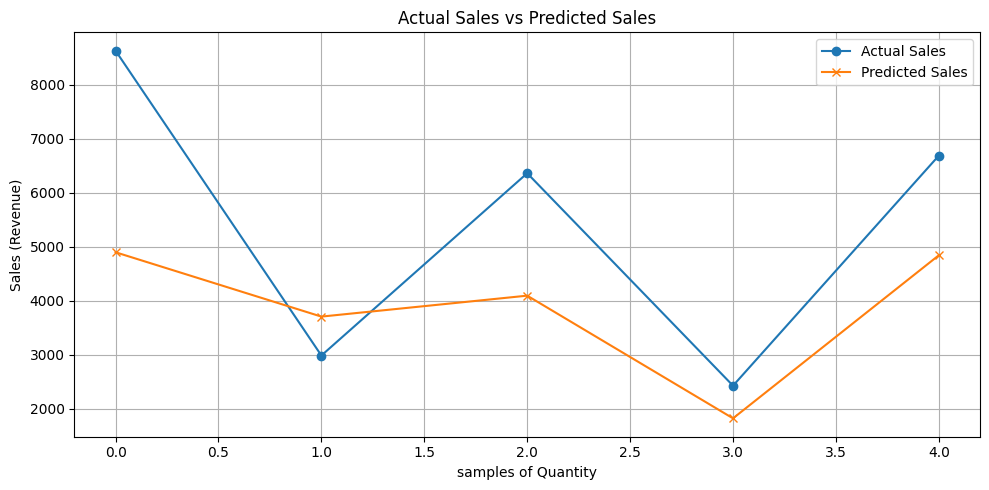

,Actual Revenue,Predicted Revenue
0,8631.54,4899.530651
1,2987.58,3708.345966
2,6362.98,4096.173538
3,2428.95,1824.612046
4,6689.11,4844.126712


In [ ]:
# Features and Target
X = df[['Quantity']]           
y = df['Revenue']              

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('samples of Quantity')
plt.ylabel('Sales (Revenue)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison = pd.DataFrame({'Actual Revenue': y_test.values, 'Predicted Revenue': y_pred})
comparison.head(10)